# Laboratorio 1 

## Task 1
1. Considera un modelo de regresión lineal con dos características, X₁ y, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?

En el contexto del modelo se puede interpretar que por cada unidad que aumente o disminuya la característica X₂, el resultado y se verá afectado por esa característica en un factor de 3w₂. 

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en el contexto de la regresión lineal es cuando dos o más variables independientes están relacionadas entre sí. La multicolinealidad afecta a la interpretación de las variables por separado debido a que al estar 2 o más variables relacionadas no se sabe la influencia que tiene una sola de estas variables sobre el modelo, ya que la variabilidad de esta variable puede explicar lo mismo que la variabilidad de la otra variable. A su vez los coeficientes de regresión son menos precisos y más sensibles a pequeñas variaciones, por lo que son difíciles de interpretar.  


**Brandon Sicay - 21757** 
**Daniel Morales - 21**

## Importar las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder





## Importar el conjunto de datos


In [4]:
path = "dataset_phishing.csv"

data = pd.read_csv(path)

data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## Verificar si los datos estan balanceados mediante el conteo de instancias para cada clase de nuestra columna objetivo

In [8]:


conteo_clases = data['status'].value_counts() 
# imprime el número de instancias (filas) por cada clase 
print(conteo_clases)




legitimate    5715
phishing      5715
Name: status, dtype: int64


#### Podemos observar que nuestro dataset esta perfectamente balanceado, contando con la misma cantidad de instancias para url's pertenecientes a phising y legítimas


## Codificar datos 


### Codificar la variable dependiente

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()
status = encoder.fit_transform(data['status'])

print(status)

[0 1 1 ... 0 0 1]


### Feature selection

| URL based features        | Content based features    | External features  |
|---------------------------|---------------------------|--------------------|
| IP - 01                   | hyperlinks int            | whois 01           |
| HTTPS token 01              | external css int          | domain age int     |
| radio of digits float     | login forms 01            | web traffic int    |
| punycode 01               | external favicon 01       | dns record 01      |
| port 01                   | links in tags float       | google index 01    |
| tld 01                    | submit to email 01        |                    |
| abnormal subdomains 01    | invisible iframe 01       |                    |
| subdomains int            | pop up window 01          |                    |
| prefix suffix 01          | right click 01            |                    |
| shortening service 01     | domain in title 01        |                    |
| path extension 01         |                           |                    |
| phish hints int           |                           |                    |
| brand domains 01          |                           |                    |
| statical report 01        |                           |                    |

**Para Variables Binarias (0/1):**

- Encoding: No necesitan encoding adicional ya que ya están en formato numérico.
- Escalado:N o se requiere escalado ya que están en un rango  (0, 1).


**Para Variables Numéricas (Int, Float):**

- Encoding: No necesitan encoding ya que son numéricas.
- Escalado: Se usará estandarización (StandardScaler en Scikit-learn)

### Feature Scaling de la variable independiente

In [16]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaled_features = scaler.fit_transform(data[['ratio_digits_url', 'ratio_digits_host', 'nb_subdomains', 'phish_hints', 'nb_hyperlinks', 'nb_extCSS', 'links_in_tags', 'domain_age', 'web_traffic']])
# print(scaled_features)
# features binarias
binary_features = data[['ip', 'https_token', 'punycode' , 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'shortening_service', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'domain_in_title', 'whois_registered_domain']]

# Combina las características escaladas con las binarias
combined_features = np.concatenate([scaled_features, binary_features], axis=1)
print(combined_features)

[[-0.59465091 -0.26786842  1.20609049 ...  0.          0.
   0.        ]
 [ 1.87605348 -0.26786842 -1.93342541 ...  0.          1.
   0.        ]
 [ 1.09285634 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 ...
 [ 1.00404016 -0.26786842 -0.36366746 ...  0.          0.
   0.        ]
 [-0.59465091 -0.26786842 -0.36366746 ...  0.          1.
   0.        ]
 [ 0.36724497  8.1428769   1.20609049 ...  0.          1.
   1.        ]]


 ## Split para training, testing 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_features, status, test_size=0.2, random_state=1)


## Feature Importance


<function matplotlib.pyplot.show(close=None, block=None)>

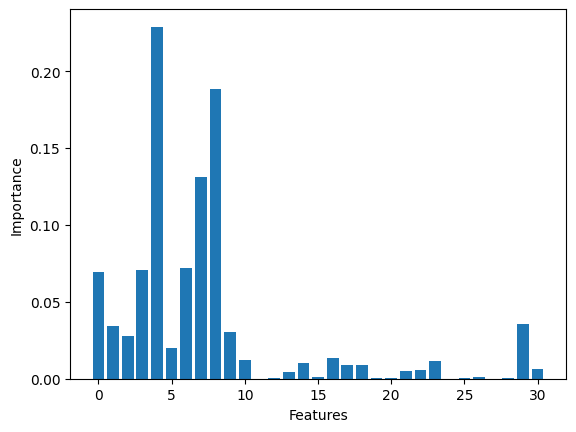

In [13]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Se utilzará la técnica de feature importance, la cual utiliza la métrica de Impureza de Gini, que mide 
# la disminución de la impureza del árbol causada por un feature con el modelo Random Forest

model = RandomForestClassifier()
model.fit(X_train, y_train)

# obtener las importancias 
importances = model.feature_importances_

plt.bar(range(X_train.shape[1]), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show


In [22]:
print(X_train)

[[ 1.07956887 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 [-0.59465091 -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 [ 0.1391745  -0.26786842  1.20609049 ...  0.          1.
   0.        ]
 ...
 [ 2.20305846  3.1852235   1.20609049 ...  0.          1.
   0.        ]
 [-0.07414684 -0.26786842 -0.36366746 ...  0.          0.
   0.        ]
 [-0.59465091 -0.26786842  1.20609049 ...  0.          1.
   0.        ]]


## Grafico

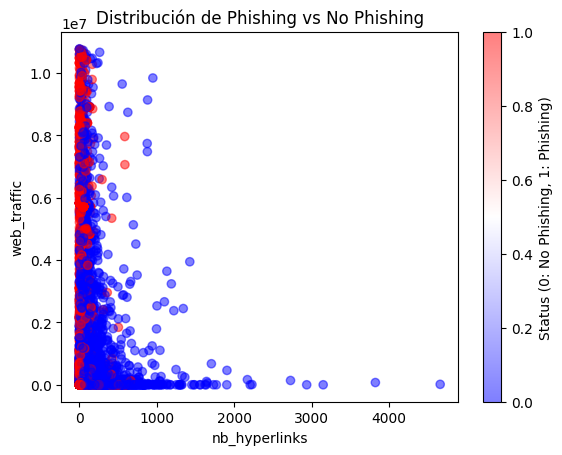

In [21]:
import matplotlib.pyplot as plt

# Supongamos que 'feature1' y 'feature2' son tus dos características seleccionadas
plt.scatter(data['nb_hyperlinks'], data['web_traffic'], c=status, cmap='bwr', alpha=0.5)
plt.xlabel('nb_hyperlinks')
plt.ylabel('web_traffic')
plt.title('Distribución de Phishing vs No Phishing')
plt.colorbar(label='Status (0: No Phishing, 1: Phishing)')
plt.show()
